In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

#No Batch
model = tf.keras.models.load_model('./fashion_mnist.h5')
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) =fashion_mnist.load_data()
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

2024-05-30 15:10:20.873190: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-30 15:10:20.874471: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 15:10:20.887939: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 15:10:21.068967: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 15:10:24.035738: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
[9 0 0 3 0 2 7 2 5 5]
 * Prediction,  [2 2 2 2 2 2 2 2 2 2]


In [6]:
#Batch
model = tf.keras.models.load_model('./fashion_mnist2.h5')
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) =fashion_mnist.load_data()
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[9 0 0 3 0 2 7 2 5 5]
 * Prediction,  [9 0 0 3 0 2 7 2 5 5]


In [7]:
#BatchRelu
model = tf.keras.models.load_model('./fashion_mnist3.h5')
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) =fashion_mnist.load_data()
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[9 0 0 3 0 2 7 2 5 5]
 * Prediction,  [9 0 0 3 1 2 7 2 5 5]


In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
historyNoBatch = pickle.load(open('./historyNoBatch', "rb"))
historyBatch = pickle.load(open('./historyBatch', "rb"))
historylelu = pickle.load(open('./historyBatchRelu', "rb"))
val_accNB = historyNoBatch["val_accuracy"]
val_lossNB= historyNoBatch["val_loss"]
val_lossB = historyBatch["val_loss"]
val_accB = historyBatch["val_accuracy"]
val_lossL = historylelu["val_loss"]
val_accL = historylelu["val_accuracy"]

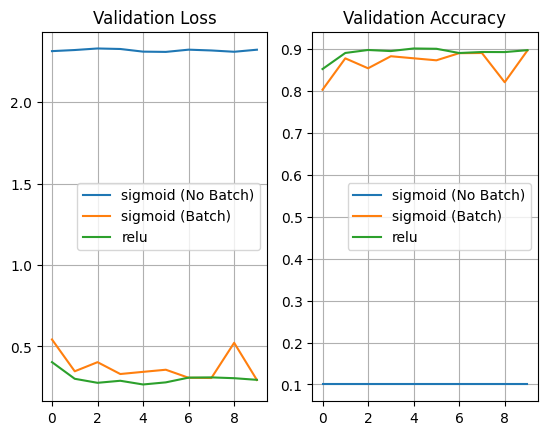

In [12]:
plt.subplot(1,2,1)
plt.title('Validation Loss')
plt.plot(range(len(val_lossNB)),val_lossNB,label = "sigmoid (No Batch)")
plt.plot(range(len(val_lossB)),val_lossB,label = "sigmoid (Batch)")
plt.plot(range(len(val_lossL)),val_lossL,label = "relu")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.title('Validation Accuracy')
plt.plot(range(len(val_accNB)),val_accNB,label = "sigmoid (No Batch)")
plt.plot(range(len(val_accB)),val_accB,label = "sigmoid (Batch)")
plt.plot(range(len(val_accL)),val_accL,label = "relu")
plt.grid()
plt.legend()
plt.savefig("Summary.png")
plt.show()